In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

In [7]:
dataframe = read_csv('D:\\Downloads\\100.csv', usecols=[1], engine='python')

(0.0, 1000.0)

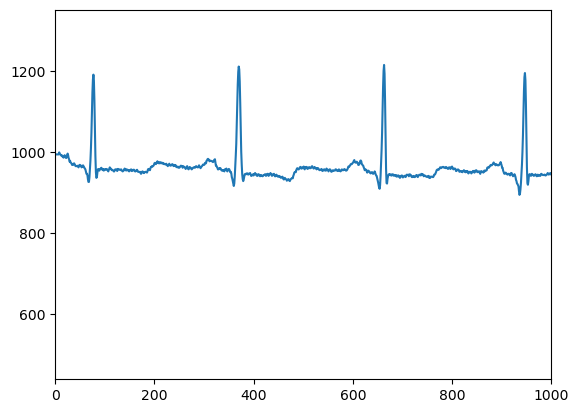

In [12]:
plt.plot(dataframe)
plt.xlim(0,1000)

In [22]:
dataset=dataframe[0:18000]

In [89]:
def filter(s, t, alpha, beta):

  x10 = z[0]
  filt = [x10]
  der10 = 0

  for i in range(1, len(t)):

    x11 = x10 + alpha*(z[i]- x10)
    der11 = der10 + beta*(z[i] - der10) / (t[i] - t[i-1])

    x10 = x11 + (t[i] - t[i-1])*der11
    der10 = der11

    filt.append(x11)

  return filt

In [54]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [55]:
dataset

array([[0.6192771],
       [0.6192771],
       [0.6192771],
       ...,
       [0.4915663],
       [0.4698795],
       [0.3457831]], dtype=float32)

In [80]:
filted = filter(dataset[0:18000], t, 0.4, 0.00005)

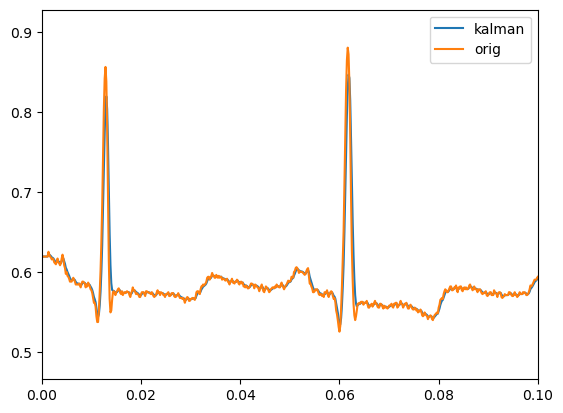

In [81]:
plt.plot(t, filted, label="kalman")
plt.plot(t, dataset[0:18000], label="orig")
plt.xlim(0,0.1)
plt.legend()

In [51]:
dataset

array([[995.],
       [995.],
       [995.],
       ...,
       [889.],
       [871.],
       [768.]], dtype=float32)

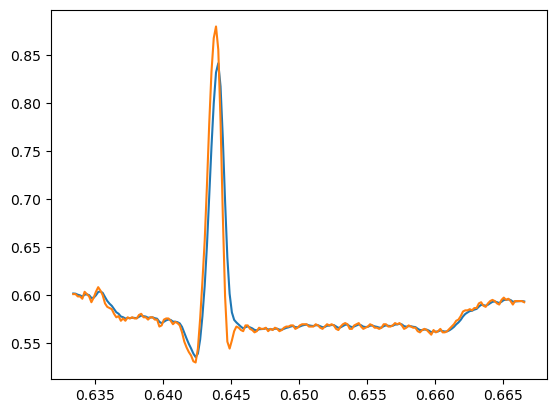

In [87]:
n1, n2 = 3800, 4000
plt.plot(t[n1:n2], filted[n1:n2])
plt.plot(t[n1:n2], dataset[n1:n2])